# Assignment 1 – Computer Vision  
**Name:** Harmanpreet Kaur  
**Student ID:** 1002273536   
**Date:** February 5, 2026


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

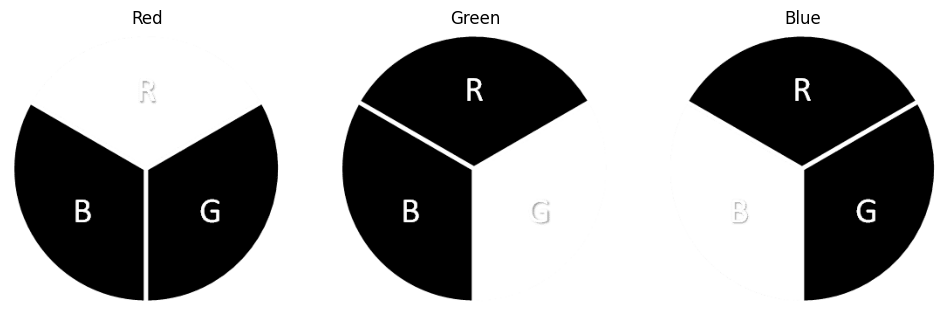

In [33]:
#Question1.a)
img = img = cv2.imread("Images/colors.png")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(R, cmap='gray'); plt.title("Red"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(G, cmap='gray'); plt.title("Green"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(B, cmap='gray'); plt.title("Blue"); plt.axis('off')
plt.show()


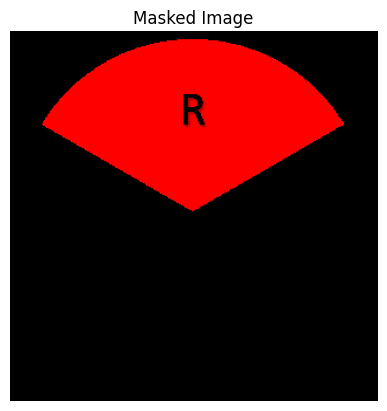

In [34]:
# b)
mask = (R >= 100) & (R <= 255) & (G <= 50) & (B <= 50)

masked_img = np.zeros_like(img)
masked_img[mask] = img[mask]

plt.imshow(masked_img)
plt.title("Masked Image")
plt.axis('off')
plt.show()


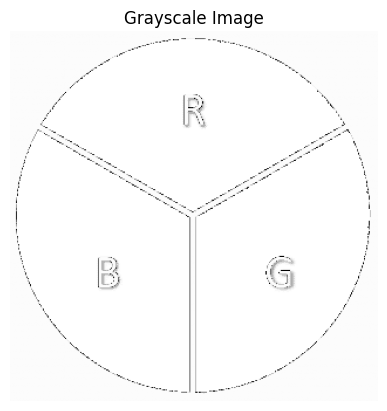

In [35]:
# c)
gray = ((R + G + B) / 3).astype(np.uint8)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


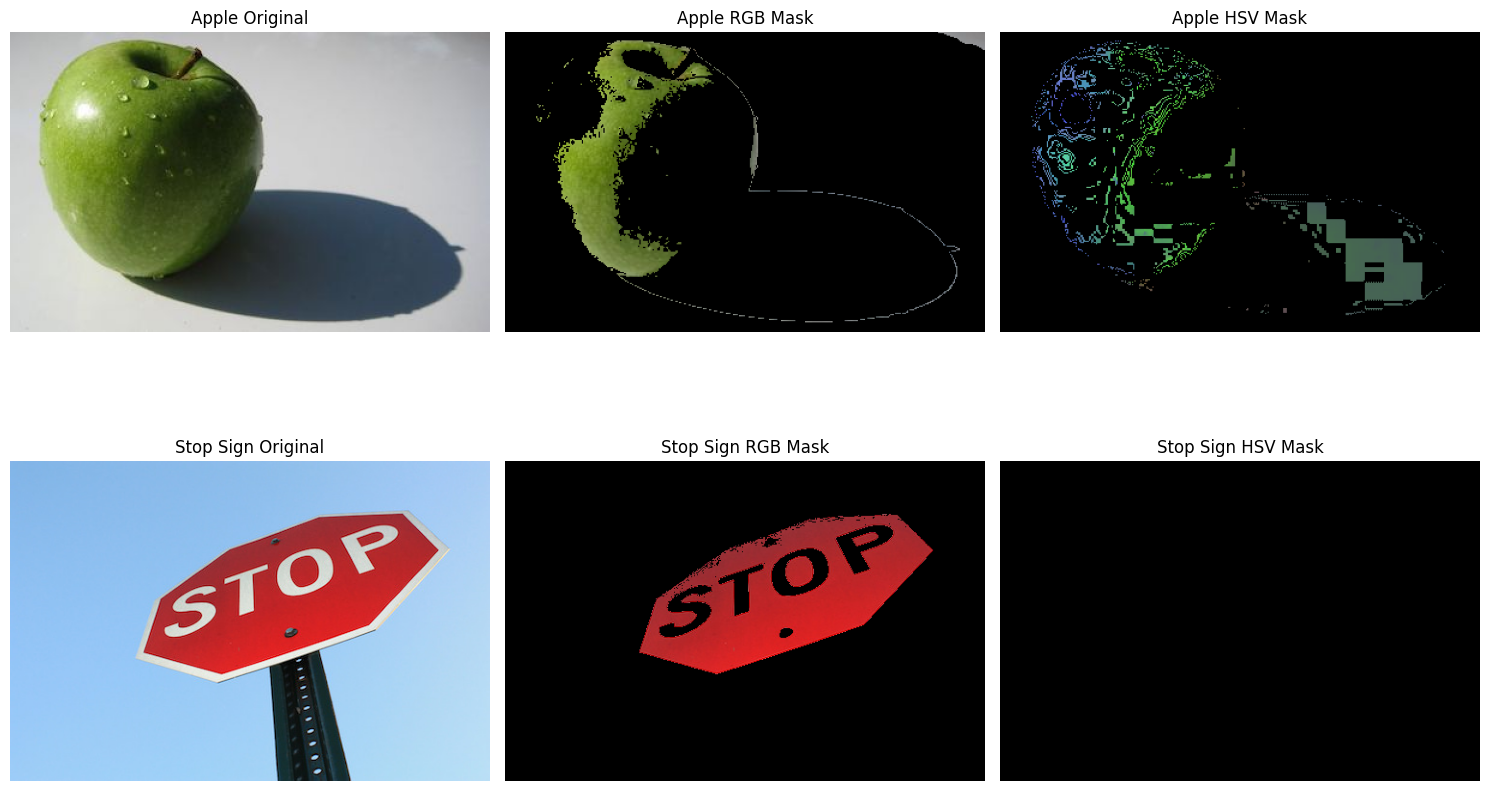

In [36]:
# Question 2.
# Manual RGB to HSV conversion
def rgb2hsv(img):
    img = img.astype('float32') / 255.0  # normalize
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    
    cmax = np.max(img, axis=2)
    cmin = np.min(img, axis=2)
    delta = cmax - cmin

    h = np.zeros_like(cmax)
    s = np.zeros_like(cmax)
    v = cmax

    mask = delta != 0
    # Hue calculation
    h[mask & (cmax == r)] = (60 * ((g[mask & (cmax == r)] - b[mask & (cmax == r)]) / delta[mask & (cmax == r)])) % 360
    h[mask & (cmax == g)] = (60 * ((b[mask & (cmax == g)] - r[mask & (cmax == g)]) / delta[mask & (cmax == g)]) + 120)
    h[mask & (cmax == b)] = (60 * ((r[mask & (cmax == b)] - g[mask & (cmax == b)]) / delta[mask & (cmax == b)]) + 240)

    # Saturation
    s[cmax != 0] = delta[cmax != 0] / cmax[cmax != 0]

    hsv = np.stack([h, s, v], axis=2)
    return hsv

# RGB segmentation masks

def mask_green_rgb(img):
    lower = np.array([0, 100, 0])
    upper = np.array([150, 255, 150])
    mask = cv2.inRange(img, lower, upper)
    return cv2.bitwise_and(img, img, mask=mask)

def mask_red_rgb(img):
    lower = np.array([150, 0, 0])
    upper = np.array([255, 100, 100])
    mask = cv2.inRange(img, lower, upper)
    return cv2.bitwise_and(img, img, mask=mask)

# -----------------------------
# HSV segmentation masks
# -----------------------------
def mask_green_hsv(hsv_img):
    # Hue range for green: ~90°–150°, normalized to 0–1
    lower = np.array([90/360, 0.3, 0.2])
    upper = np.array([150/360, 1, 1])
    hsv_uint8 = (hsv_img * 255).astype(np.uint8)
    mask = cv2.inRange(hsv_uint8, (lower*255).astype(np.uint8), (upper*255).astype(np.uint8))
    return cv2.bitwise_and((hsv_img*255).astype(np.uint8), (hsv_img*255).astype(np.uint8), mask=mask)

def mask_red_hsv(hsv_img):
    # Red wraps around hue, need two ranges
    hsv_uint8 = (hsv_img*255).astype(np.uint8)
    lower1 = np.array([0, 128, 50])   # first red range
    upper1 = np.array([15, 255, 255])
    lower2 = np.array([345, 128, 50]) # second red range
    upper2 = np.array([360, 255, 255])
    
    # Convert hue from 0-360 to 0-255
    lower1_uint8 = (lower1 / np.array([360,1,1])*255).astype(np.uint8)
    upper1_uint8 = (upper1 / np.array([360,1,1])*255).astype(np.uint8)
    lower2_uint8 = (lower2 / np.array([360,1,1])*255).astype(np.uint8)
    upper2_uint8 = (upper2 / np.array([360,1,1])*255).astype(np.uint8)

    mask1 = cv2.inRange(hsv_uint8, lower1_uint8, upper1_uint8)
    mask2 = cv2.inRange(hsv_uint8, lower2_uint8, upper2_uint8)
    mask = cv2.bitwise_or(mask1, mask2)

    return cv2.bitwise_and(hsv_uint8, hsv_uint8, mask=mask)

# Load images

apple = cv2.imread('Images/apple.jpg')
apple = cv2.cvtColor(apple, cv2.COLOR_BGR2RGB)

stop_sign = cv2.imread('Images/stop-sign.jpg')
stop_sign = cv2.cvtColor(stop_sign, cv2.COLOR_BGR2RGB)

# Convert to HSV manually
apple_hsv = rgb2hsv(apple)
stop_hsv = rgb2hsv(stop_sign)

# Apply masks
apple_rgb_masked = mask_green_rgb(apple)
apple_hsv_masked = mask_green_hsv(apple_hsv)

stop_rgb_masked = mask_red_rgb(stop_sign)
stop_hsv_masked = mask_red_hsv(stop_hsv)

# Plot results
fig, axes = plt.subplots(2, 3, figsize=(15,10))

# Row 1: Apple
axes[0,0].imshow(apple)
axes[0,0].set_title("Apple Original")
axes[0,1].imshow(apple_rgb_masked)
axes[0,1].set_title("Apple RGB Mask")
axes[0,2].imshow(apple_hsv_masked)
axes[0,2].set_title("Apple HSV Mask")

# Row 2: Stop Sign
axes[1,0].imshow(stop_sign)
axes[1,0].set_title("Stop Sign Original")
axes[1,1].imshow(stop_rgb_masked)
axes[1,1].set_title("Stop Sign RGB Mask")
axes[1,2].imshow(stop_hsv_masked)
axes[1,2].set_title("Stop Sign HSV Mask")

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()


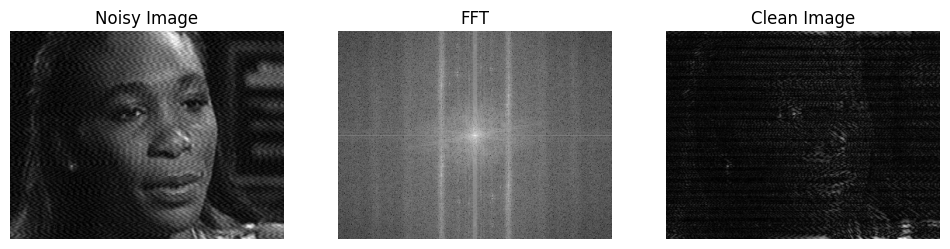

In [37]:
# Question 3)
img = cv2.imread("Images/bandnoise.png", 0)

fft = np.fft.fftshift(np.fft.fft2(img))
magnitude = np.log(1 + np.abs(fft))

rows, cols = img.shape
mask = np.ones((rows, cols), np.uint8)
mask[rows//2-10:rows//2+10, :] = 0  # notch filter

filtered_fft = fft * mask
clean_img = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_fft)))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Noisy Image"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(magnitude, cmap='gray'); plt.title("FFT"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(clean_img, cmap='gray'); plt.title("Clean Image"); plt.axis('off')
plt.show()



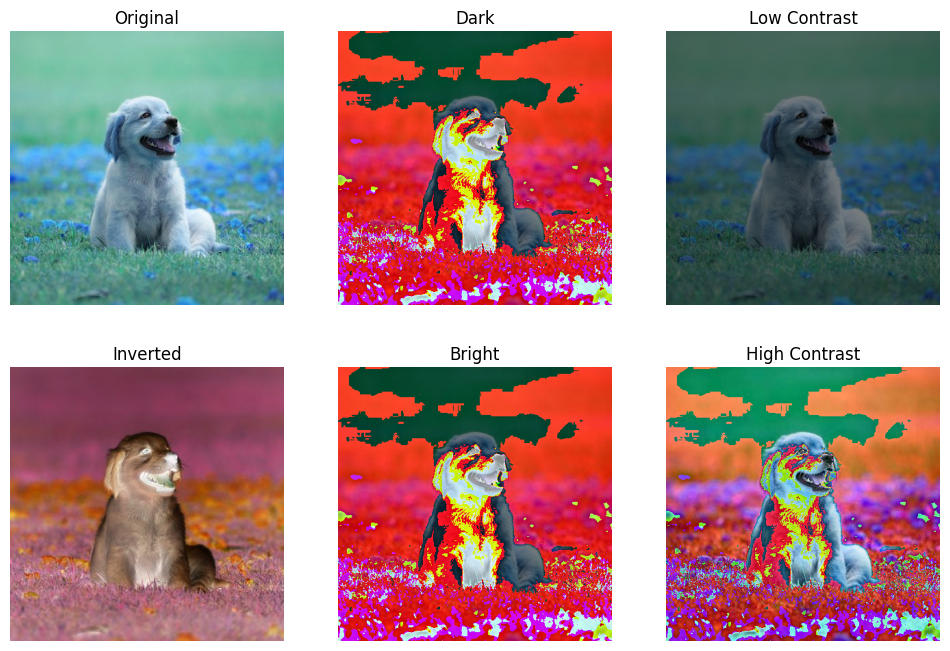

In [38]:
# Question 4)
img = cv2.imread("Images/dog.jpg")

dark = np.clip(img - 128, 0, 255)
low_contrast = img // 2
invert = 255 - img
bright = np.clip(img + 128, 0, 255)
high_contrast = np.clip(img * 2, 0, 255)

plt.figure(figsize=(12,8))
titles = ["Original","Dark","Low Contrast","Inverted","Bright","High Contrast"]
images = [img, dark, low_contrast, invert, bright, high_contrast]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()



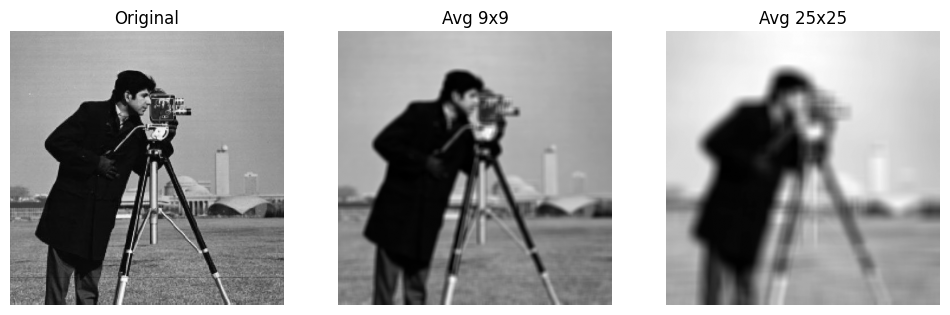

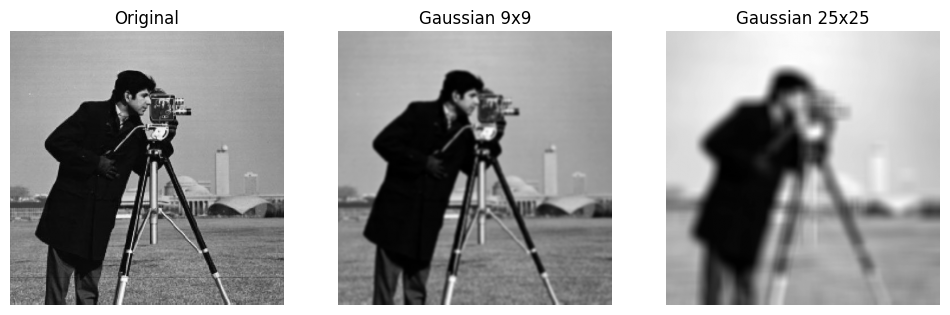

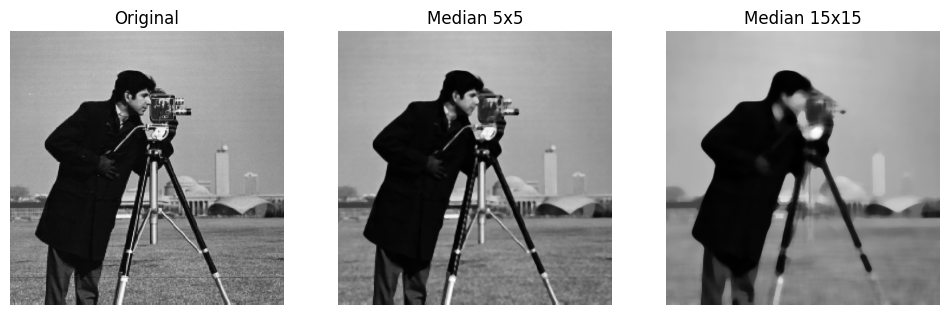

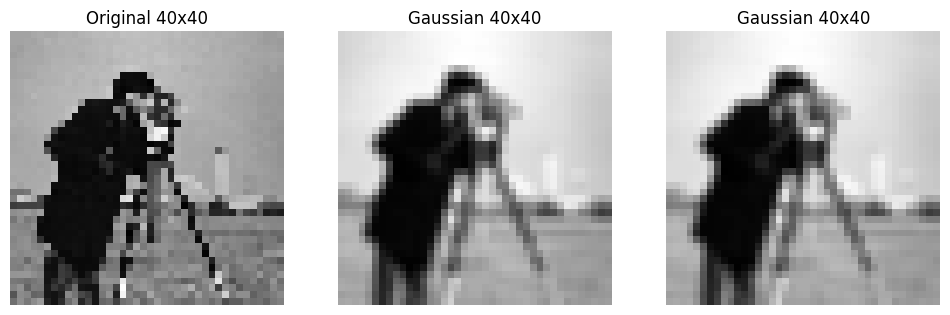

In [39]:
# Question 5)

img = cv2.imread("Images/cameraman.jpeg", 0)

avg9 = cv2.blur(img, (9,9))
avg25 = cv2.blur(img, (25,25))

g9 = cv2.GaussianBlur(img, (9,9), 2.0)
g25 = cv2.GaussianBlur(img, (25,25), 15)

m5 = cv2.medianBlur(img, 5)
m15 = cv2.medianBlur(img, 15)

g25_small = cv2.resize(g25, (40,40))
img_small = cv2.resize(img, (40,40))

def show3(a,b,c,titles):
    plt.figure(figsize=(12,4))
    for i,x in enumerate([a,b,c]):
        plt.subplot(1,3,i+1)
        plt.imshow(x, cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

show3(img, avg9, avg25, ["Original","Avg 9x9","Avg 25x25"])
show3(img, g9, g25, ["Original","Gaussian 9x9","Gaussian 25x25"])
show3(img, m5, m15, ["Original","Median 5x5","Median 15x15"])
show3(img_small, g25_small, g25_small, ["Original 40x40","Gaussian 40x40","Gaussian 40x40"])

